In [55]:
print ("hi")

hi


In [56]:
import numpy as np
from scipy.stats import norm

In [57]:
#custom mean and standard deviation funcitons
def compute_mean(data):
    return sum(data) / len(data)

def compute_std(data):
    mean = compute_mean(data)
    variance = sum((x - mean)**2 for x in data) / len(data)
    return variance ** 0.5

In [58]:
#parameters for normal distribution
mu, sigma = 0,5
#generating samples
samples = norm.rvs(loc=mu, scale=sigma, size=10000)

#using my functions
my_mean = compute_mean(samples)
my_std = compute_std(samples)

#using numpy functions
np_mean = np.mean(samples)
np_std = np.std(samples)

print ("my custom functions mean: {:.5f}, std dev: {:.5f}" .format(my_mean, my_std))
print ("built in numpy mean: {:.5f}, std dev: {:.5f}" .format(np_mean, np_std))

my custom functions mean: -0.02709, std dev: 5.01786
built in numpy mean: -0.02709, std dev: 5.01786


<function matplotlib.pyplot.show(close=None, block=None)>

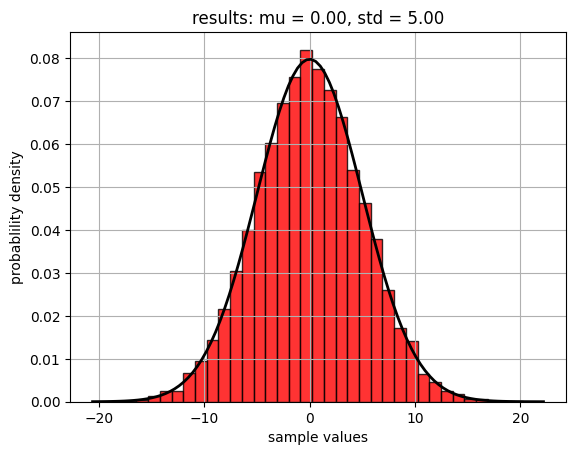

In [59]:
#histogram plot
import matplotlib.pyplot as plt 

plt.hist(samples, bins=35, density=True, alpha=0.8, color = 'r', edgecolor = 'k')

#plot the normal distribution curve 
xmin, xmax = plt.xlim()
#linspace generates evenely spaced numbers within the histogram's x axis limits 
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x,p,'k',linewidth=2)


title = "results: mu = %.2f, std = %.2f" % (mu, sigma)
plt.title(title)
plt.ylabel("probablility density")
plt.xlabel("sample values")
plt.grid(True)

plt.show

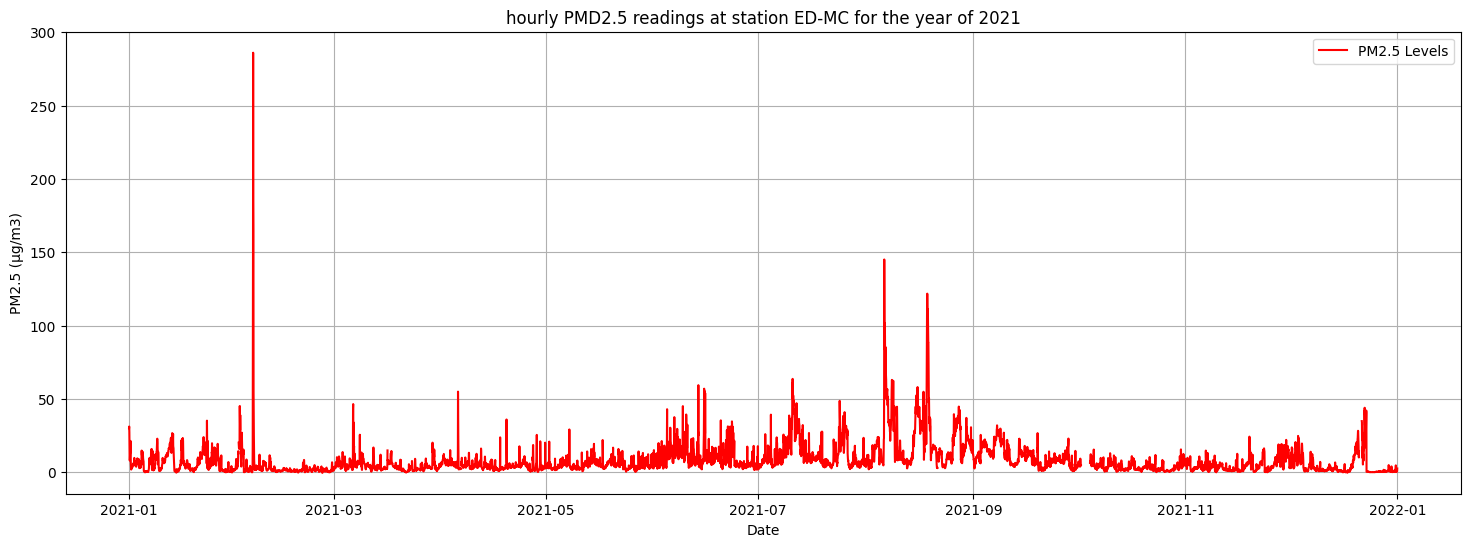

In [60]:
#part 2 reading the csv
#load the data from the csv
import pandas as pd
df = pd.read_csv('data/2021-PM2.5.csv')

#convert date to datetime objects in a dataframe
df['Date'] = pd.to_datetime(df['Date'])

#print(df.describe())

#filtering the data from a station ED-MC
station_data = df[['Date', 'ED-MC']].copy();

#plot the data from this station
plt.figure(figsize=(18,6))
plt.plot(station_data['Date'], station_data['ED-MC'], label = 'PM2.5 Levels', color = 'r')
plt.title('hourly PMD2.5 readings at station ED-MC for the year of 2021')
plt.xlabel('Date')
plt.ylabel("PM2.5 (µg/m3)")
plt.grid(True)
plt.legend()



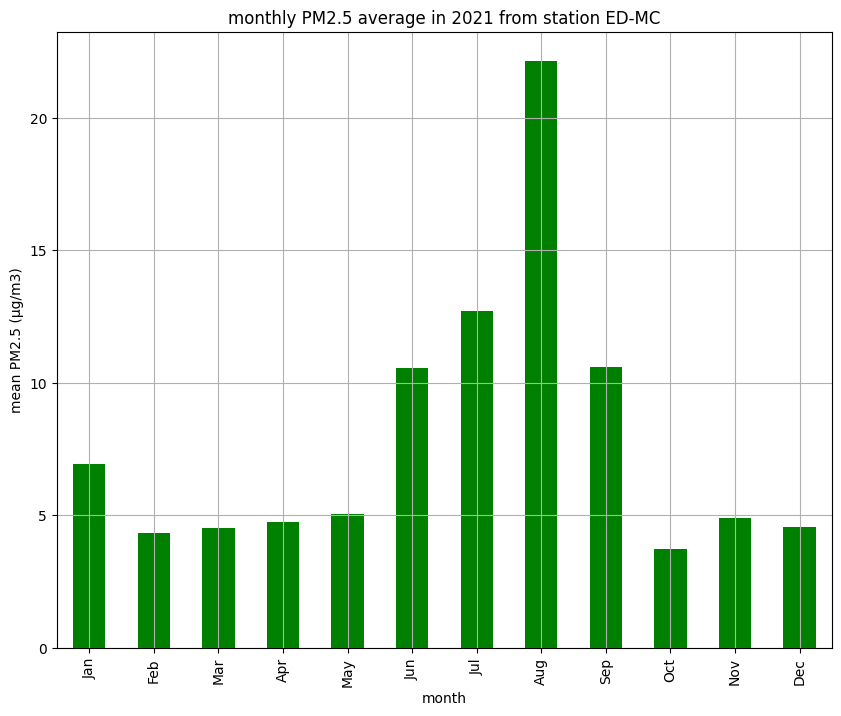

In [61]:
#plotting the monthly pm2.5 levels with a bar chart 
month_mean = station_data.groupby(station_data['Date'].dt.month)['ED-MC'].mean()
plt.figure(figsize= (10, 8))
month_mean.plot(kind = 'bar', color = 'green')
plt.title('monthly PM2.5 average in 2021 from station ED-MC')
plt.xlabel('month')
plt.xticks(ticks=range(0,12), labels=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('mean PM2.5 (µg/m3)')
plt.grid(True)
plt.show()

# Interpretations of monthy data
- PM2.5 mean quantity is seen to greatly increase into the warmer summer months
- this is likely due to the many factors that result in poor air quality in the summer months in the salt lake vally
- pollutants are posibly  trapped in the valley due to the inversion phenomenon with cahgnes in weather



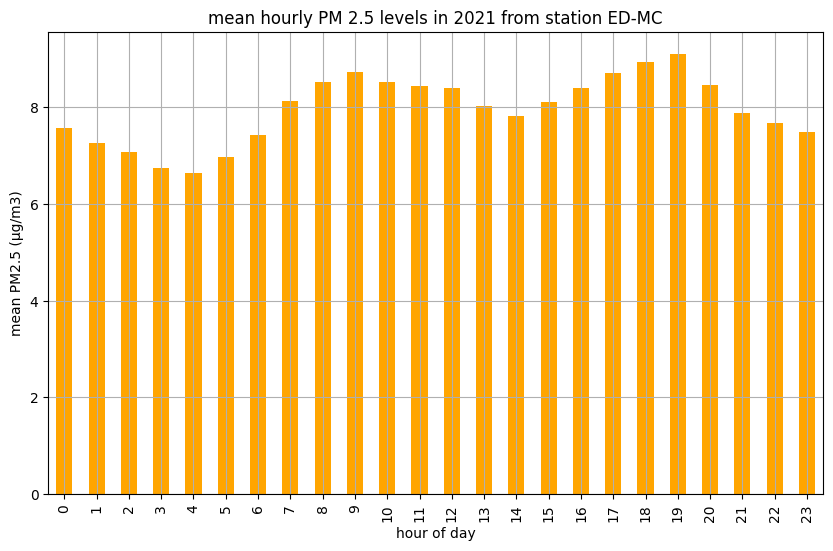

In [62]:
#group the data by time of day (hour) 
#plot the mean pollution level for each hour
hour_mean = station_data.groupby(station_data['Date'].dt.hour)['ED-MC'].mean()
plt.figure(figsize = (10, 6))
hour_mean.plot(kind = 'bar' , color = 'orange')
plt.title('mean hourly PM 2.5 levels in 2021 from station ED-MC')
plt.xlabel('hour of day')
plt.ylabel('mean PM2.5 (µg/m3)')
plt.grid(True)
plt.show()



# interperation from hourly PM2.5 data from 2021
- suggests some variation throughout the day , specifically peaking twice aroudn 9 am and 7 pm
- this is a strong correlation with common rush hour times for people commuting to work
- the PM2.5 values are also lowest in uncommon driving times such as 4am and 2pm


<function matplotlib.pyplot.show(close=None, block=None)>

<Figure size 1000x500 with 0 Axes>

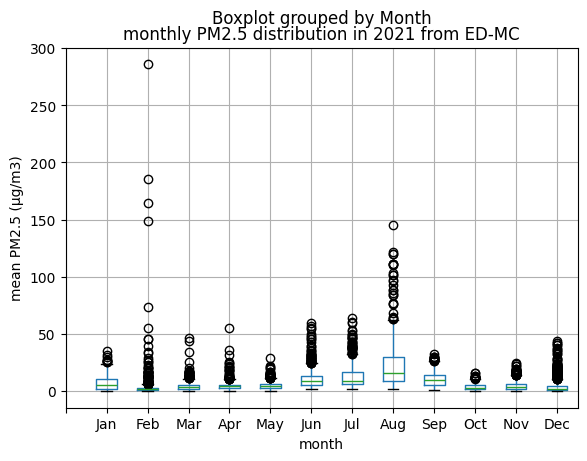

In [63]:
#use box and whiusker plonts for data grouping
station_data['Month'] = station_data['Date'].dt.month

#Box plots for monthly distributions
plt.figure(figsize= (10,5))
station_data.boxplot(column='ED-MC', by ='Month')
plt.title('monthly PM2.5 distribution in 2021 from ED-MC')
plt.xlabel('month')
plt.xticks(ticks=range(0,13), labels=['' , 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.ylabel('mean PM2.5 (µg/m3)')
plt.show

# Insight on monthly boxplot PM2.5 levels
- This view gives a perspective on the data which allows us to see some more outliers
- the boxplot provides a way to view the spread and distribution of the data points from the dataset
- specifically there are noticable high values of PM2.5 in March that are greatly variant from the March mean PM2.5 values
- The month of August still is seen to have the greatest mean PM2.5 value

<Figure size 1200x500 with 0 Axes>

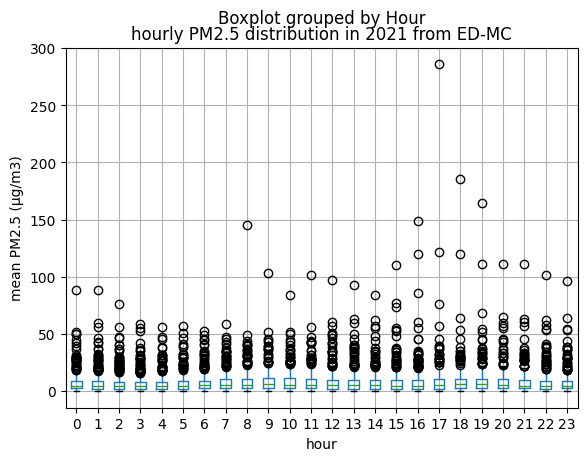

In [64]:
station_data['Hour'] = station_data['Date'].dt.hour
plt.figure(figsize= (12,5))
station_data.boxplot(column='ED-MC', by = 'Hour')
plt.title('hourly PM2.5 distribution in 2021 from ED-MC')
plt.xlabel('hour')
plt.ylabel('mean PM2.5 (µg/m3)')
plt.show()

# insight on this view of hourly PM2.5 levels box plot
- this visualization of the hourly PM2.5 levels displays higher variance in the afternoon hours
- this aligns well with what is shown in the original bar chart created, however, shows some outliers which likely cause the mean to be increased specifically between the hours of 16 and 19
- this range is a common commute time so could be a result of some particualarly busy days